In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mail-customer/Mall_Customers.csv


# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>*

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Elbow method to find optimal clusters](#3)
4. [K Means Training](#4)
5. [Visualization](#5)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#2. KMeans
from sklearn.cluster import KMeans

<a id="2"></a>
# 2. Importing Dataset

[Go back to Index](#index)

In [3]:
df = pd.read_csv("/kaggle/input/mail-customer/Mall_Customers.csv")

In [4]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
df.iloc[:, [3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
df = pd.read_csv('/kaggle/input/mail-customer/Mall_Customers.csv')
X = df.iloc[:, [3,4]].values #Unsupervised learning, only X, also [3,4] is the random centroid we start with

<a id="3"></a>
# 3. Elbow Method to find the optimal number of clusters

[Go back to Index](#index)

<a href="https://discuss.analyticsvidhya.com/t/what-is-within-cluster-sum-of-squares-by-cluster-in-k-means/2706/2">WCSS - Within Cluster Sum of Squares</a>

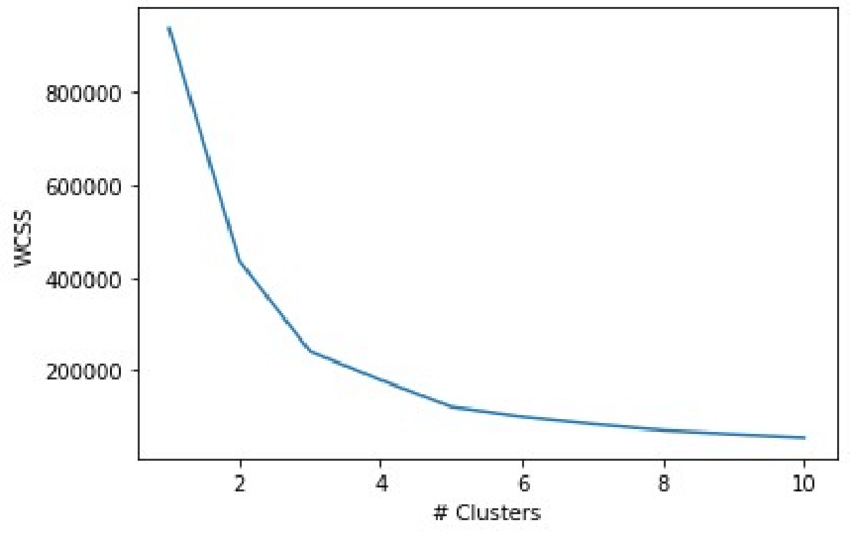

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

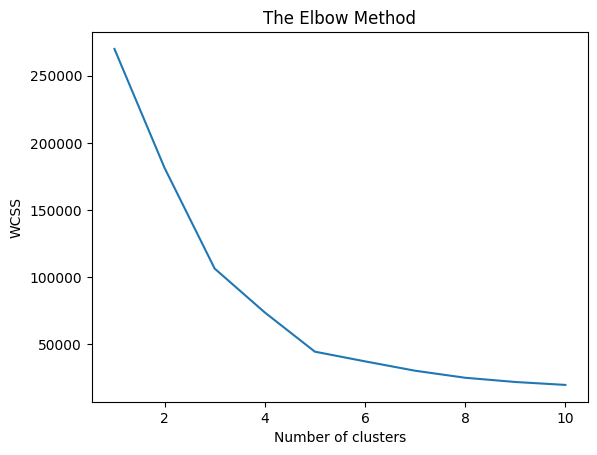

In [7]:
wcss = []

#After 10 clusters, wcss becomes neglibible (review above image)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=42) #init='k-means++':= avoid random initialization trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

The optimal number of clusters = 5 here as the WCSS starts to gradually decrease

<a id="4"></a>
# 4. Training K-Means model on the dataset

[Go back to Index](#index)

In [8]:
#The optimal number of clusters = 5 here as the WCSS starts to gradually decrease
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state=42) #init='k-means++':= avoid random initialization trap
y_kmeans = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
#All different clusters
#resultant array=>0 i.e Cluster 1, 1 i.e Cluster 2...
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

<a id="5"></a>
# 5. Visualization

[Go back to Index](#index)

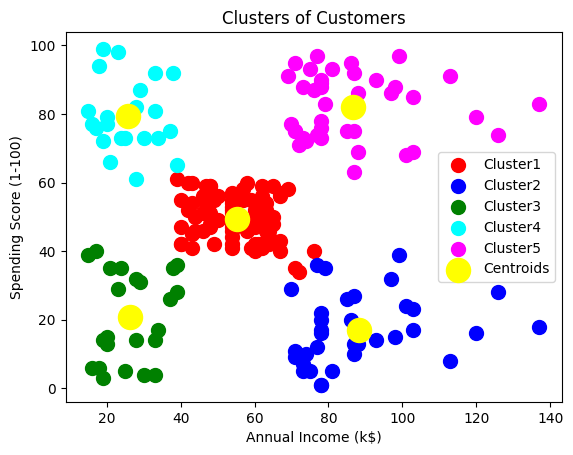

In [10]:
#Cluster 1
plt.scatter(
    X[y_kmeans == 0, 0],
    X[y_kmeans == 0, 1],
    s = 100, #size
    c = "red", #color
    label="Cluster1"
)

#Cluster 2
plt.scatter(
    X[y_kmeans == 1, 0],
    X[y_kmeans == 1, 1],
    s = 100, #size
    c = "blue", #color
    label="Cluster2"
)

#Cluster 3
plt.scatter(
    X[y_kmeans == 2, 0],
    X[y_kmeans == 2, 1],
    s = 100, #size
    c = "green", #color
    label="Cluster3"
)

#Cluster 4
plt.scatter(
    X[y_kmeans == 3, 0],
    X[y_kmeans == 3, 1],
    s = 100, #size
    c = "cyan", #color
    label="Cluster4"
)

#Cluster 5
plt.scatter(
    X[y_kmeans == 4, 0],
    X[y_kmeans == 4, 1],
    s = 100, #size
    c = "magenta", #color
    label="Cluster5"
)

#Centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s = 300,
    c = "yellow",
    label = "Centroids"
)

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()